Check Python version

In [58]:
!python --version   

Python 3.10.13


Import libraries

In [59]:
import json
import yaml
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### **Extract Data**

In [60]:
# Through online GitHub
file_name = 'https://github.com/ourownstory/neuralprophet-data/raw/main/datasets/air_passengers.csv'

In [61]:
train_df = pd.read_csv(file_name)

In [62]:
train_df.shape

(144, 2)

In [63]:
train_df.columns

Index(['ds', 'y'], dtype='object')

In [64]:
train_df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [65]:
train_df.tail()

,ds,y
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390
143,1960-12-01,432


Define the required time and target columns

In [66]:
time_col = train_df.columns[0]
target_col = train_df.columns[-1]
train_df[time_col] = train_df[time_col].astype(str)

Change target column to float

In [67]:
train_df[target_col] = train_df[target_col].astype(float)

In [68]:
train_df.head()

,ds,y
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


Plot graph

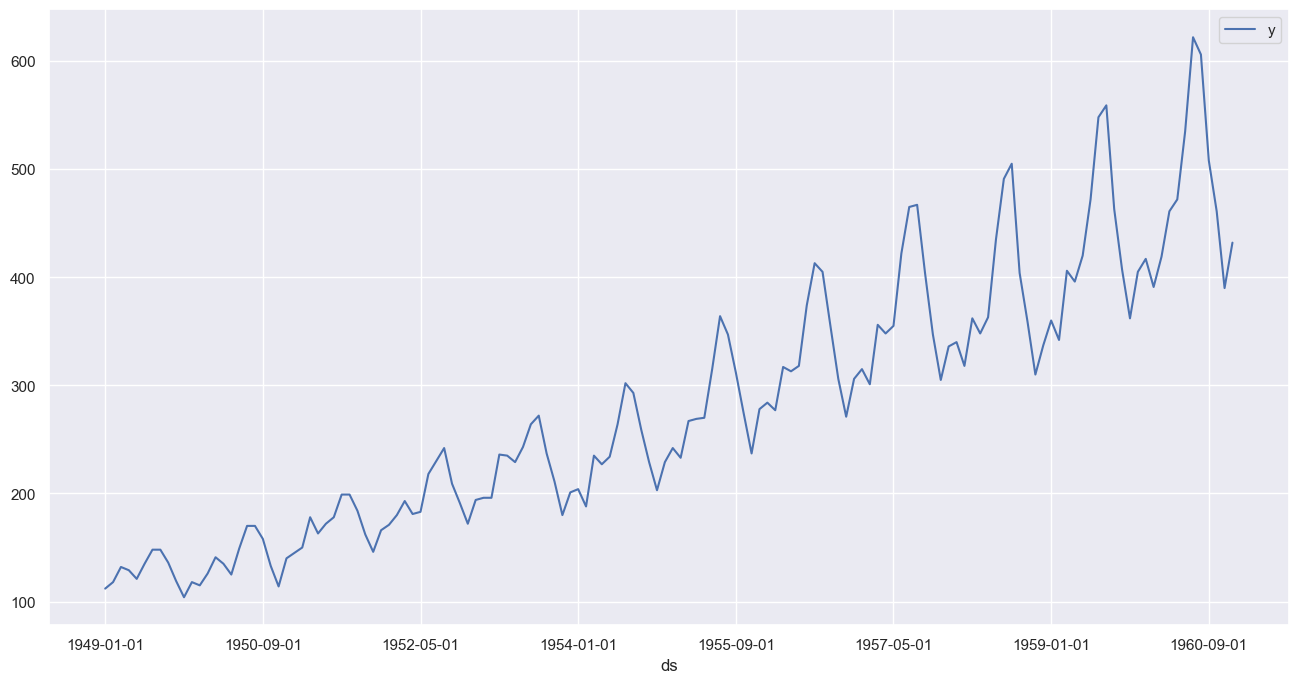

In [69]:
figsize = (16, 8)
train_df.set_index(time_col).plot(figsize=figsize);

### **Train API**

Train data: convert df to list-of-list

In [70]:
train_data = []

In [71]:
for value in train_df.values:
    train_data.append(list(value))

In [72]:
train_data[:10]

[['1949-01-01', 112.0],
 ['1949-02-01', 118.0],
 ['1949-03-01', 132.0],
 ['1949-04-01', 129.0],
 ['1949-05-01', 121.0],
 ['1949-06-01', 135.0],
 ['1949-07-01', 148.0],
 ['1949-08-01', 148.0],
 ['1949-09-01', 136.0],
 ['1949-10-01', 119.0]]

Define Model Request (optional)

In [73]:
# # Default model request
# model_request = {
#     'type': 
#     # 'meta_naive',
#     # 'meta_lr',  
#     'meta_naive',
#     'scorers': ['smape', 'mape'],
#     'params': {
#         'preprocessors': [
#             {'type': 'dartsimputer', 'params': {'strategy': 'mean'}},
#             # {'type': 'simpleimputer', 'params': {'strategy': 'mean'}},
#             {'type': 'minmaxscaler'},
#         ],
#         'base_models': [
#             # {'type': 'darts_rnn'},
#             # {'type': 'darts_lightgbm'},
#             # {'type': 'darts_autotheta'},
#             # {'type': 'darts_autoarima'},
#             # {'type': 'darts_autoets'},
#             {'type': 'darts_naive'},
#             {'type': 'darts_seasonalnaive'},
    
#             # {'type': 'stats_autotheta'},
#             # {'type': 'stats_autoarima'},
#             # {'type': 'stats_autoets'},
#         ],
#     },
# }

# # Default model request
# model_request = {
#     'type': 'meta_lr',  # 'meta_wa'
#     'scorers': ['smape', 'mape'],
#     'params': {
#         'preprocessors': [
#             {'type': 'dartsimputer', 'params': {'strategy': 'mean'}},
#             # {'type': 'simpleimputer', 'params': {'strategy': 'mean'}},
#             {'type': 'minmaxscaler'},
#         ],
#         'base_models': [
#             {'type': 'darts_rnn'},
#             {'type': 'darts_lightgbm'},
#             {'type': 'darts_autotheta'},
#             {'type': 'darts_autoarima'},
#             {'type': 'darts_autoets'},
#             # {'type': 'stats_autotheta'},
#             # {'type': 'stats_autoarima'},
#             # {'type': 'stats_autoets'},
#         ],
#     },
# }

# Customized model request
# model_request = {
#     'type': 
#         'meta_naive',
#         # 'meta_wa',
#         #'meta_lr'
#     'scorers': ['smape', 'mape'],
#     'params': {
#         'preprocessors': [
#             {'type': 'dartsimputer', 'params': {'strategy': 'mean'}},
#             # {'type': 'simpleimputer', 'params': {'strategy': 'mean'}},
#             {'type': 'minmaxscaler'},
#         ],
#         'base_models': [
#             {'type': 'darts_naive'},
#             {'type': 'darts_seasonalnaive'},
#             {'type': 'darts_autotheta'},
#             # {'type': 'stats_autotheta'},
#             {'type': 'darts_autoets'},
#             # {'type': 'stats_autoets'},
#             {'type': 'darts_autoarima'},
#             # {'type': 'stats_autoarima'},
#             {'type': 'darts_tbats'},
#             {'type': 'darts_linearregression'},
#             # {'type': 'darts_lightgbm'},
#             # {'type': 'darts_rnn'},
#         ],
#     },
# }

# # Customized model request
# model_request = {
#     'type': 'meta_lr',  # 'meta_wa'
#     'scorers': ['smape', 'mape'],
#     'params': {
#         'preprocessors': [
#             {'type': 'dartsimputer', 'params': {'strategy': 'mean'}},
#             # {'type': 'simpleimputer', 'params': {'strategy': 'mean'}},
#             {'type': 'minmaxscaler'},
#         ],
#         'base_models': [
#             {'type': 'darts_naive'},
#             {'type': 'darts_seasonalnaive'},
#             {'type': 'darts_autotheta'},
#             # {'type': 'stats_autotheta'},
#             {'type': 'darts_autoets'},
#             # {'type': 'stats_autoets'},
#             {'type': 'darts_autoarima'},
#             # {'type': 'stats_autoarima'},
#             {'type': 'darts_tbats'},
#             {'type': 'darts_linearregression'},
#             # {'type': 'darts_lightgbm'},
#             # {'type': 'darts_rnn'},
#         ],
#     },
# }



In [74]:
# file_path = 'model_request.json'
file_path = 'model_request.yaml'

# # For writing the model request to a json file
# with open(file_path, 'r') as file:
#     model_request = json.load(file)

# For reading the model request from a yaml file
with open(file_path, 'r') as file:
    model_request = yaml.safe_load(file)
print(model_request)

{'type': 'meta_lr', 'scorers': ['smape', 'mape'], 'params': {'preprocessors': [{'type': 'dartsimputer', 'params': {'strategy': 'mean'}}, {'type': 'minmaxscaler'}], 'base_models': [{'type': 'darts_naive'}, {'type': 'darts_seasonalnaive'}, {'type': 'darts_autotheta'}, {'type': 'darts_autoets'}, {'type': 'darts_autoarima'}, {'type': 'darts_tbats'}, {'type': 'darts_linearregression'}]}}


Train API JSON Payload

In [75]:
api_json = {
    'data': train_data,
    'model': model_request  # (optional) can be commented out
}

Build URL

In [76]:
with open('url.yaml', 'r') as file:
    url_dict = yaml.safe_load(file)

In [77]:
# URL to our SYBIL AWS service
protocol = url_dict['protocol']
host = url_dict['host']
port = url_dict['port']
endpoint = 'train'

url = '%s://%s:%s/%s' % (protocol, host, str(port), endpoint)

In [78]:
# protocol, host, port

Call endpoint, receive response JSON, write to output file

In [79]:
%%time
response = requests.post(url, json=api_json)
print(response)
print()

<Response [200]>

CPU times: total: 0 ns
Wall time: 2min 1s


In [80]:
train_json_out = response.json()  # dict output
train_json_out

{'model': 'AgEBCNcdAQDQHQEA7acAABgAAADipwAA9xMAAD+AAGVsaZOMb5Rsb4xtlARhaZRNYYFpYWlhjIwuYQtlgR9hbIxylBcuZmlsTmlnfWlyYWWMcoF0lIx4b2FEeX1vaB9hdpRWlJRzX3hveGFlcIFhcG94dF9lZQ1llHRkc5RfZR95k2FhYZRplE51dAJSlP99S4Z1ZXJydYx5QyhXh1v/fR9LhgSoLMVJfgI3uz91+S6yNs5SiAxBxUl/Azi8QNhckh8WS89TiAxCxkoxtepuoyer4WWaHqI6vvR4rTG162+kKB+sRMj+grc7v/R4rjK2TtIHi8FFyf6CuDzApipg5BmdIR9X2xCUGLA0au4jpytg5BqeIro+dPctsTVq7iSoLMRIfR8BN7s/dPgusjYcoNZajxOXzVGGlJRuhnSGdF9njGWUgh+BjC5kc3eTZCgAlGiIjP//lGJSVZROlH2Ub2l9YXJlZAmUlHgouJQAlGgA4IYAH5R2c3RmCmeJY4xLeIyMZHUprGiFKJSUlMOMTmEIZX2CCmVoh5BXh1v/dABA4IYAH5RpaQlodYxpjGFpdmUCb19ub3ZvdV90c3Vyck5jY2VzDl90ZXV2lHNfdGNzX3RldGAKH2Zlb2Fsc3KTbm5oZGVuTm9paIcBQ3uMC2FjlGxpYQFlHnKUbQ5lTn0NYZQoKDNoOmhoKJRoe32UlIKBaEyUS4mB1B9OYpSUSGgNaGgBQmsD6ICIICfAWWD4AJgxFa61TlXuhh+NJi3GXkPc43uDG7S7VFvzjAKbojpC2nN6ExqySzDIzx9obwigqEBI4Hld9v2WnTbO1W51DqaLIyvDy2P8A5yjOx/USuLqgooiu8JaYvqTeBAXsLdQ6PCIjyjBpT5F3uV9Fh8dtr1W7tNrcwsSq0RL4+uDHJIqMsrRagMKoqpiS7x1dR8vYk5oY2dLlHhoAWiBaGiFKAEEAICAIEDggIAAwACAwB+AoOBAo

### **Forecast API**

Forecast Dates: predict the next 2 years of air passenger data (1961-1962)

In [81]:
dates = [
    '1961-01-01', '1961-02-01', '1961-03-01', '1961-04-01', '1961-05-01', '1961-06-01',
    '1961-07-01', '1961-08-01', '1961-09-01', '1961-10-01', '1961-11-01', '1961-12-01',
    '1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01', '1962-05-01', '1962-06-01',
    '1962-07-01', '1962-08-01', '1962-09-01', '1962-10-01', '1962-11-01', '1962-12-01',
]

Model from Train API

In [82]:
model = train_json_out['model']

Forecast API JSON Payload

In [83]:
api_json = {
    'model': model,
    'data': dates
}

Build URL (same as train except for the endpoint)

In [84]:
endpoint = 'forecast'

url = '%s://%s:%s/%s' % (protocol, host, str(port), endpoint)

Call endpoint, receive response JSON, write to output file

In [85]:
%%time
response = requests.post(url, json=api_json)
print(response)
print()

<Response [200]>

CPU times: total: 0 ns
Wall time: 2.06 s


In [86]:
forecast_json_out = response.json()  # dict output
forecast_json_out

{'data': [['1960-12-31T00:00:00', 415.33711028416366],
  ['1961-01-30T00:00:00', 393.3363384874374],
  ['1961-03-01T00:00:00', 427.81900195515504],
  ['1961-03-31T00:00:00', 470.7992980380692],
  ['1961-04-30T00:00:00', 484.21212955335284],
  ['1961-05-30T00:00:00', 566.346622952025],
  ['1961-06-29T00:00:00', 653.3510285335093],
  ['1961-07-29T00:00:00', 644.5467812842909],
  ['1961-08-28T00:00:00', 539.9498870627092],
  ['1961-09-27T00:00:00', 484.40444096624685],
  ['1961-10-27T00:00:00', 405.04557749608455],
  ['1961-11-26T00:00:00', 462.25417157931236],
  ['1961-12-26T00:00:00', 467.6294625296157],
  ['1962-01-25T00:00:00', 443.0463812438637],
  ['1962-02-24T00:00:00', 483.9745304957145],
  ['1962-03-26T00:00:00', 525.208467352078],
  ['1962-04-25T00:00:00', 536.9777272633502],
  ['1962-05-25T00:00:00', 622.5918908332982],
  ['1962-06-24T00:00:00', 713.8645181880566],
  ['1962-07-24T00:00:00', 704.5126084915466],
  ['1962-08-23T00:00:00', 593.2856605171869],
  ['1962-09-22T00:00:0

Combine forecast dates and output

In [87]:
forecast_df = pd.DataFrame(
    data=forecast_json_out['data'],
    columns=[time_col, target_col],
)

In [88]:
forecast_df.shape

(24, 2)

In [89]:
forecast_df.columns

Index(['ds', 'y'], dtype='object')

In [90]:
forecast_df.head()

,ds,y
0,1960-12-31T00:00:00,415.337110
1,1961-01-30T00:00:00,393.336338
2,1961-03-01T00:00:00,427.819002
3,1961-03-31T00:00:00,470.799298
4,1961-04-30T00:00:00,484.212130


In [91]:
forecast_df.tail()

,ds,y
19,1962-07-24T00:00:00,704.512608
20,1962-08-23T00:00:00,593.285661
21,1962-09-22T00:00:00,534.466546
22,1962-10-22T00:00:00,450.896557
23,1962-11-21T00:00:00,513.218796


Plot train and forecast side-by-side

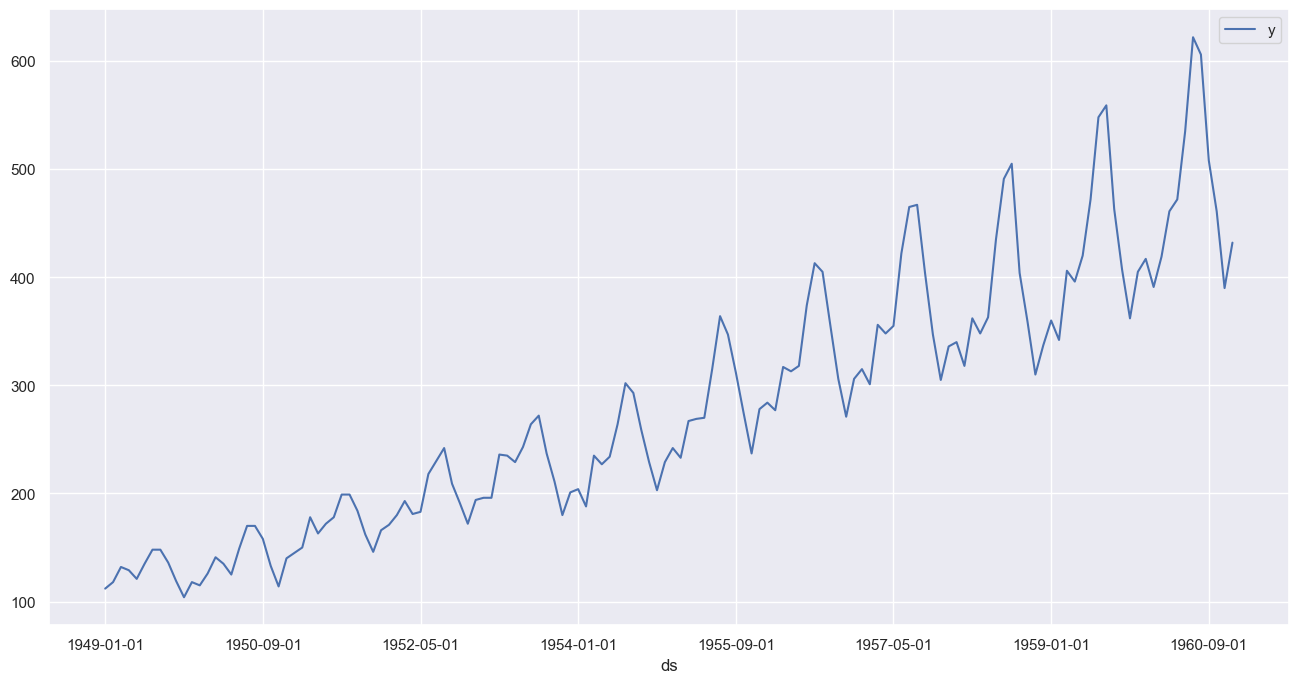

In [92]:
train_df['color'] = 'b'
train_df.set_index(time_col).plot(figsize=figsize, color=train_df['color']);

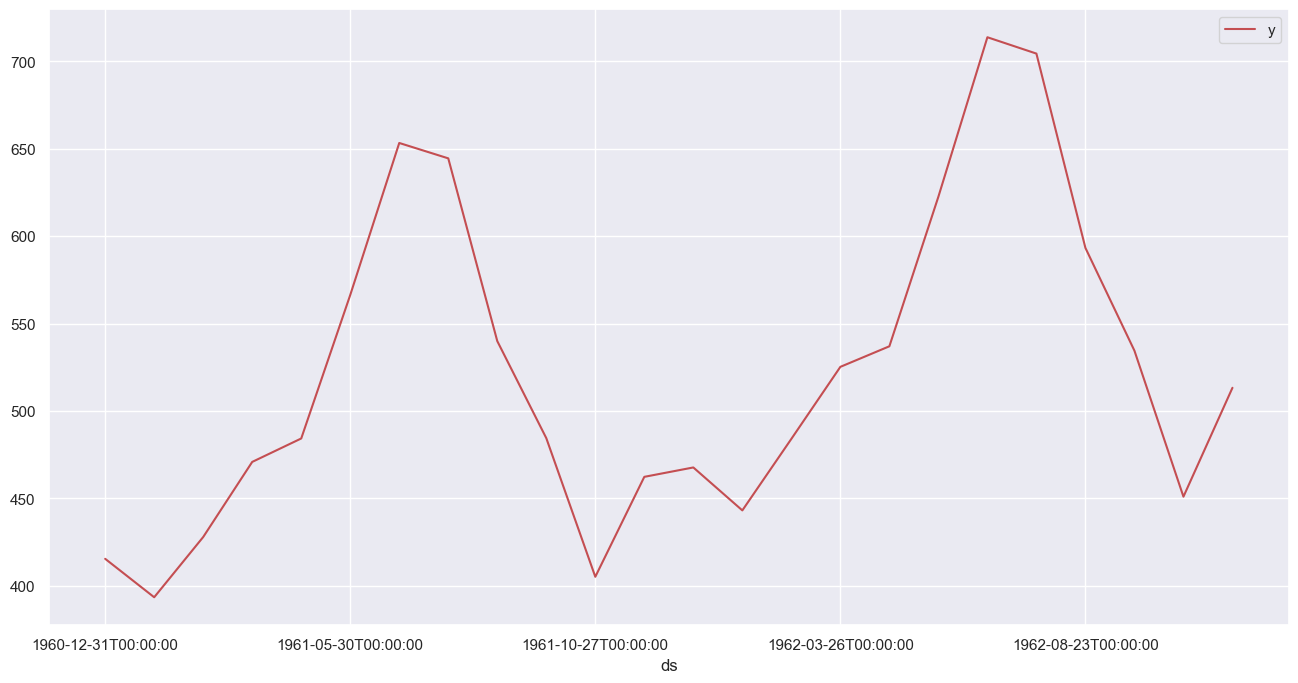

In [93]:
forecast_df['color'] = 'r'
forecast_df.set_index(time_col).plot(figsize=figsize, color=forecast_df['color']);

Combine train and forecast sets

In [94]:
df = pd.concat([train_df, forecast_df]).reset_index(drop=True)

In [95]:
df.shape

(168, 3)

In [96]:
df.head()

,ds,y,color
0,1949-01-01,112.0,b
1,1949-02-01,118.0,b
2,1949-03-01,132.0,b
3,1949-04-01,129.0,b
4,1949-05-01,121.0,b


In [97]:
df.tail()

,ds,y,color
163,1962-07-24T00:00:00,704.512608,r
164,1962-08-23T00:00:00,593.285661,r
165,1962-09-22T00:00:00,534.466546,r
166,1962-10-22T00:00:00,450.896557,r
167,1962-11-21T00:00:00,513.218796,r


Plot combined train and forecast sets with the vertical black line as the cut-off

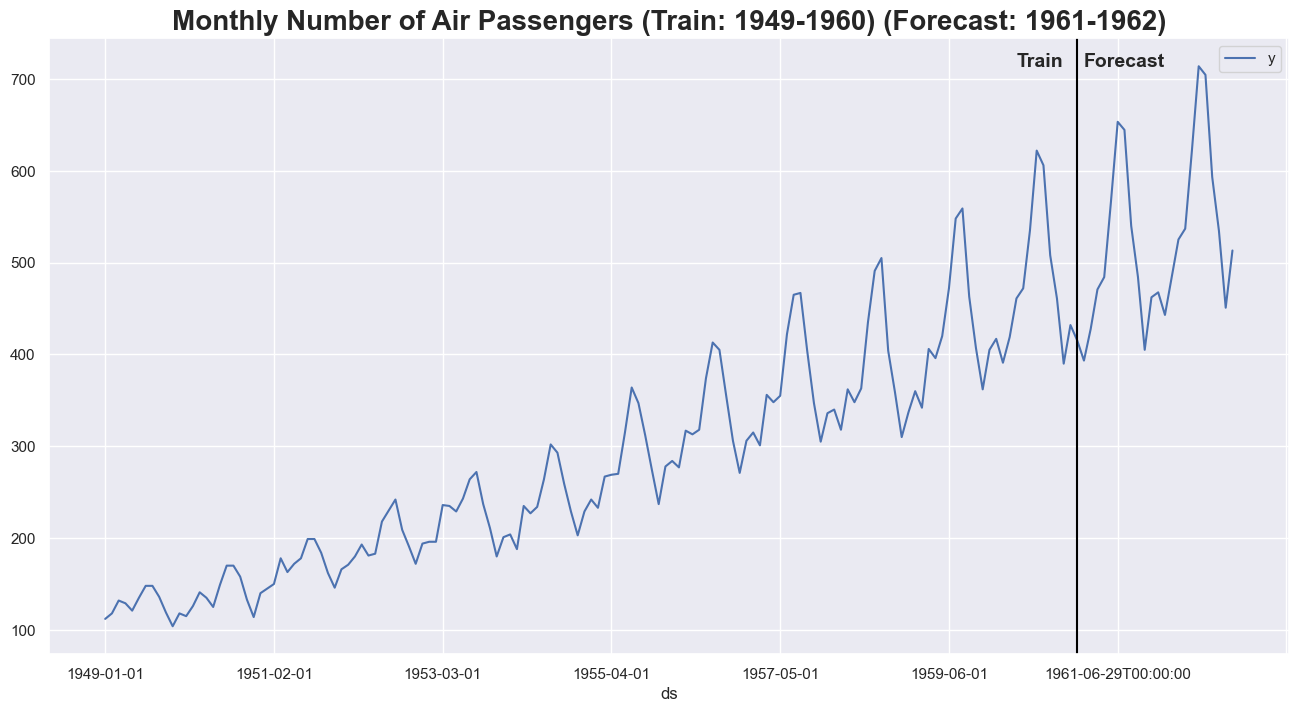

In [98]:
df.set_index(time_col).plot(figsize=figsize, color=df['color'])
plt.axvline(x=len(train_df), color='black', label='Train/Forecast set cut-off')
plt.text(x=len(train_df)-9, y=forecast_df[target_col].max(), s='Train', fontweight='bold', fontsize=14)
plt.text(x=len(train_df)+1, y=forecast_df[target_col].max(), s='Forecast', fontweight='bold', fontsize=14)
plt.title(label='Monthly Number of Air Passengers (Train: 1949-1960) (Forecast: 1961-1962)', fontweight='bold', fontsize=20)
plt.show();

In [99]:
print(train_data[-1] , forecast_df.head(1))

['1960-12-01', 432.0]                     ds          y color
0  1960-12-31T00:00:00  415.33711     r
